In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as snf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
toyota_p=pd.read_csv('ToyotaCorolla.csv',encoding="latin1",usecols=("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"))

In [3]:
toyota_p

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
toyota_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [7]:
toyota_s=scaler.fit_transform(toyota_p)

In [8]:
toyota_s

array([[ 0.76376268, -1.77196633, -0.57469494, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.83271485, -1.77196633,  0.11745379, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.88787659, -1.71818412, -0.71538641, ..., -0.14042519,
         2.98867967,  1.75856113],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-0.96004167,  0.75579727, -1.37670303, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-1.04278428,  1.0784905 , -1.82784925, ..., -0.14042519,
        -1.65690726,  0.78939926]])

In [9]:
toyota_p.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [10]:
toyota_ss=pd.DataFrame(toyota_s,columns=['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax', 'Weight'])

In [11]:
toyota_ss

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [12]:
toyota_ss.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [13]:
toyota_ss.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<Figure size 1800x1800 with 0 Axes>

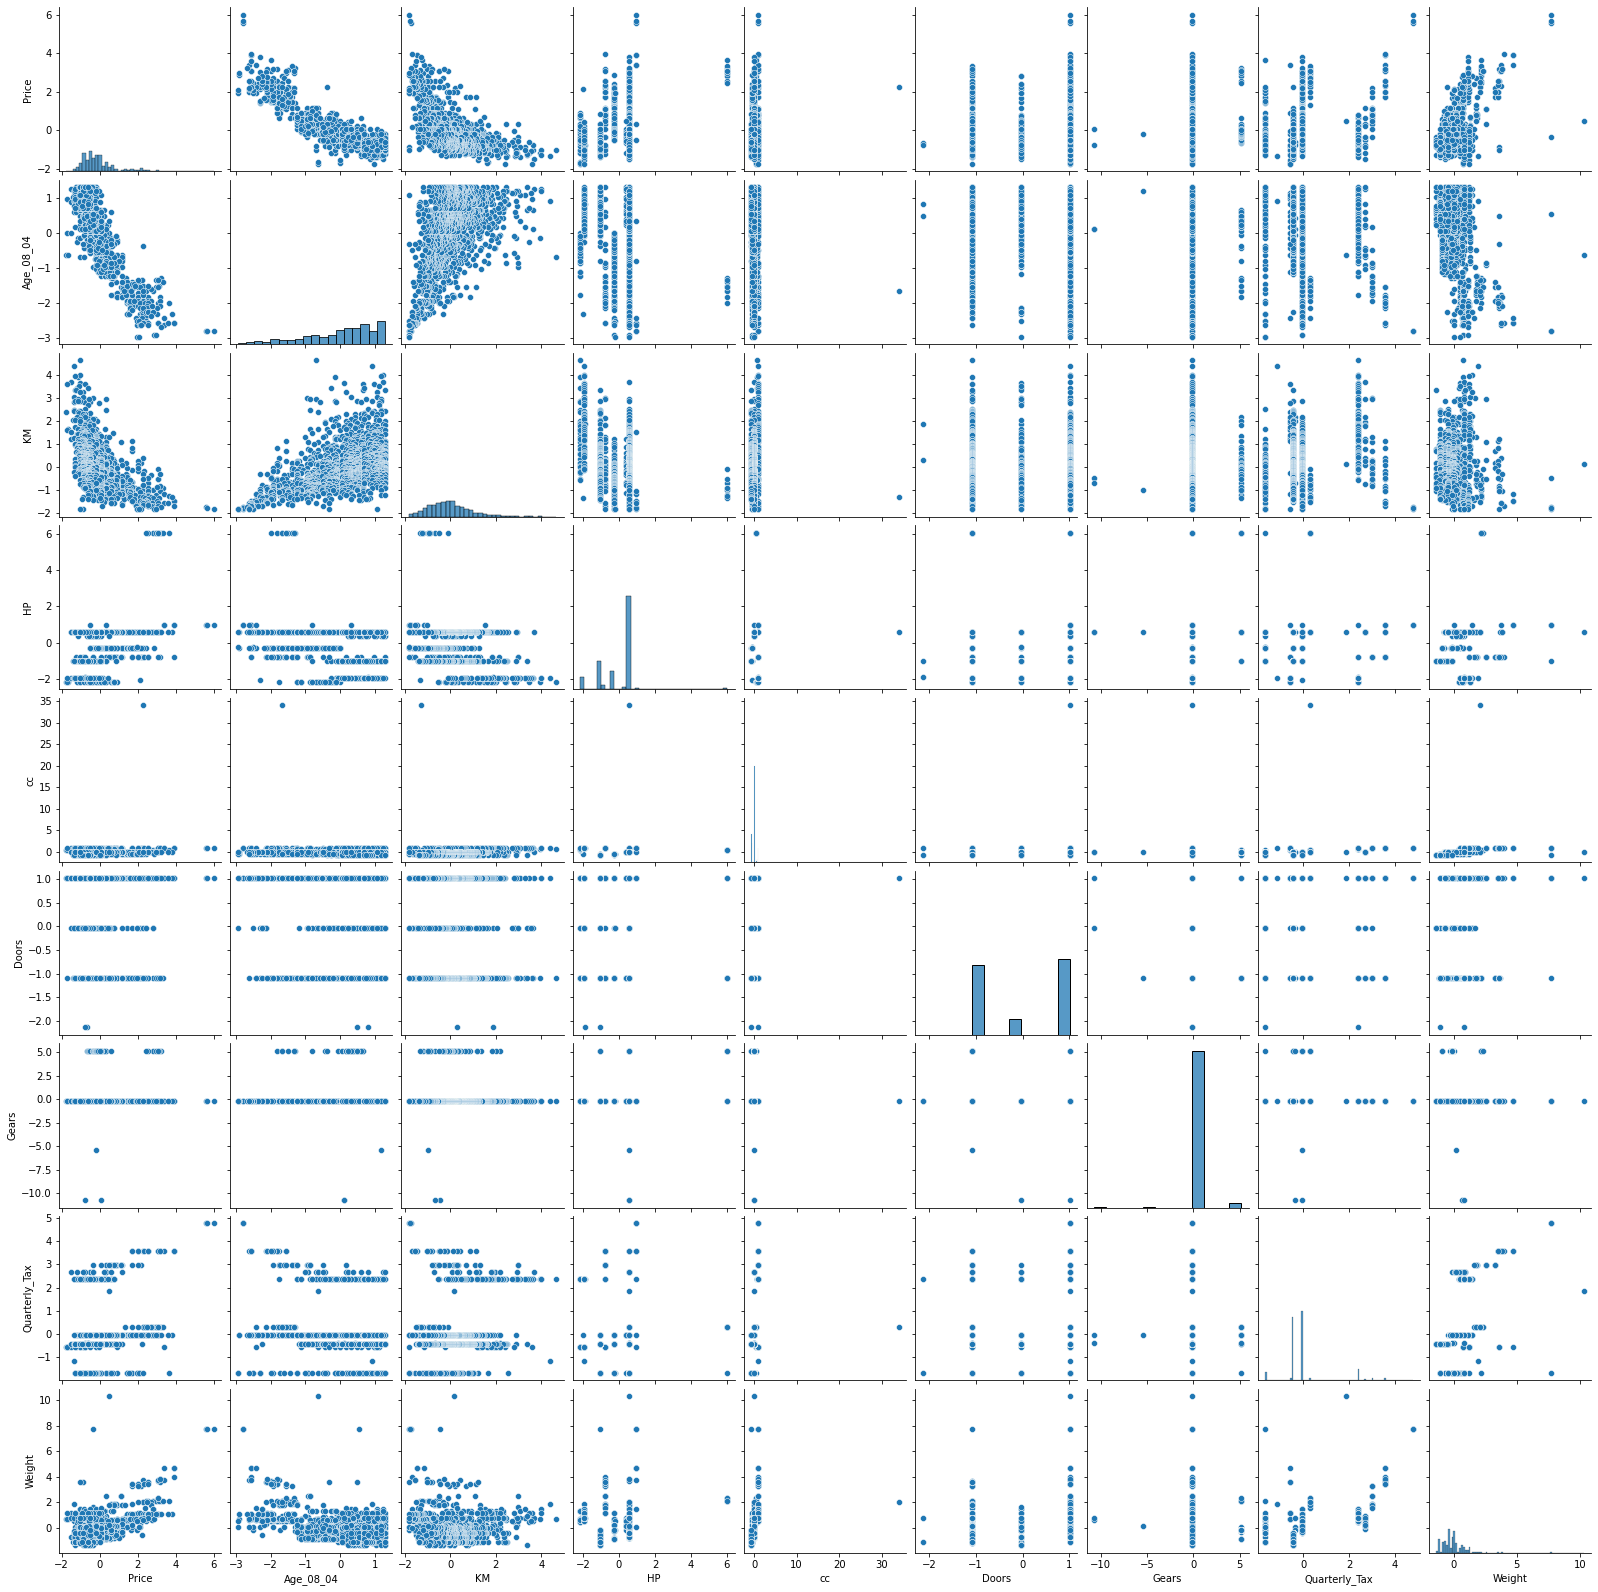

In [14]:
plt.figure(figsize=(25,25))
#sns.set_style(style='darkgrid')
sns.pairplot(toyota_ss)

In [15]:
model_s=snf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota_ss).fit()
model_s.summary()               

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:21:23   Log-Likelihood:                -606.37
No. Observations:                1436   AIC:                             1231.
Df Residuals:                    1427   BIC:                             1278.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.448e-16      0.010   1.48e-14      1.000      -0.019       0.019
Age_08_04        -0.6239      0.013    -46.512      0.000      -0.650      -0.598
KM               -0.2153      0.013    -16.622      0.000      -0.241      -0.190
HP                0.1309      0.012     11.241      0.000       0.108       0.154
cc               -0.0142      0.011     -1.344      0.179      -0.035       0.007
Doors            -0.0004      0.011     -0.040      0.968      -0.021       0.020
Gears             0.0309      0.010      3.016      0.003       0.011       0.051
Quarterly_Tax     0.0448      0.015      3.015      0.003       0.016       0.074
Weight            0.2461      0.015     15.880      0.000       0.216       0.277
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         3.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model_s.params

Intercept        1.448494e-16
Age_08_04       -6.238949e-01
KM              -2.152700e-01
HP               1.308571e-01
cc              -1.416980e-02
Doors           -4.246350e-04
Gears            3.088961e-02
Quarterly_Tax    4.478131e-02
Weight           2.461346e-01
dtype: float64

In [17]:
R_sq=pd.Series({'R_square':model_s.rsquared})

In [18]:
print('modelrsquared:',model_s.rsquared,'\n','modelrsquared_adj:',model_s.rsquared_adj)

modelrsquared: 0.8637627463428192 
 modelrsquared_adj: 0.8629989775766963


In [19]:
toyota_ss.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
X=toyota_ss[[ 'Age_08_04','KM', 'HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [22]:
X

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [23]:
vif_data=pd.DataFrame()

In [24]:
vif_data['features']=X.columns

In [25]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]

In [26]:
vif_data

,features,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [28]:
model_s.resid

0      -0.913639
1      -0.695687
2      -0.786257
3      -0.407231
4      -0.681915
          ...   
1431   -0.356830
1432    0.704322
1433    0.012605
1434   -0.366284
1435   -0.952213
Length: 1436, dtype: float64

In [29]:
import statsmodels.api as sn

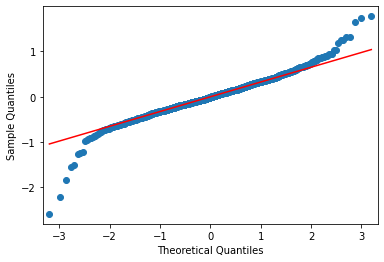

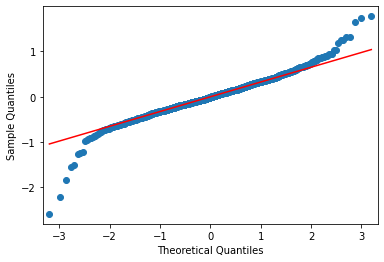

In [30]:
sn.qqplot(model_s.resid,line='q')

In [32]:
toyota_ss

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

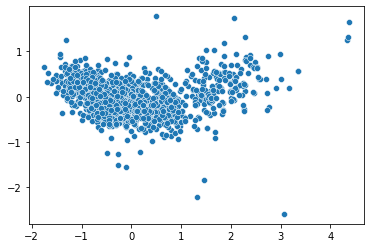

In [31]:
sns.scatterplot(model_s.fittedvalues,model_s.resid)

eval_env: 1


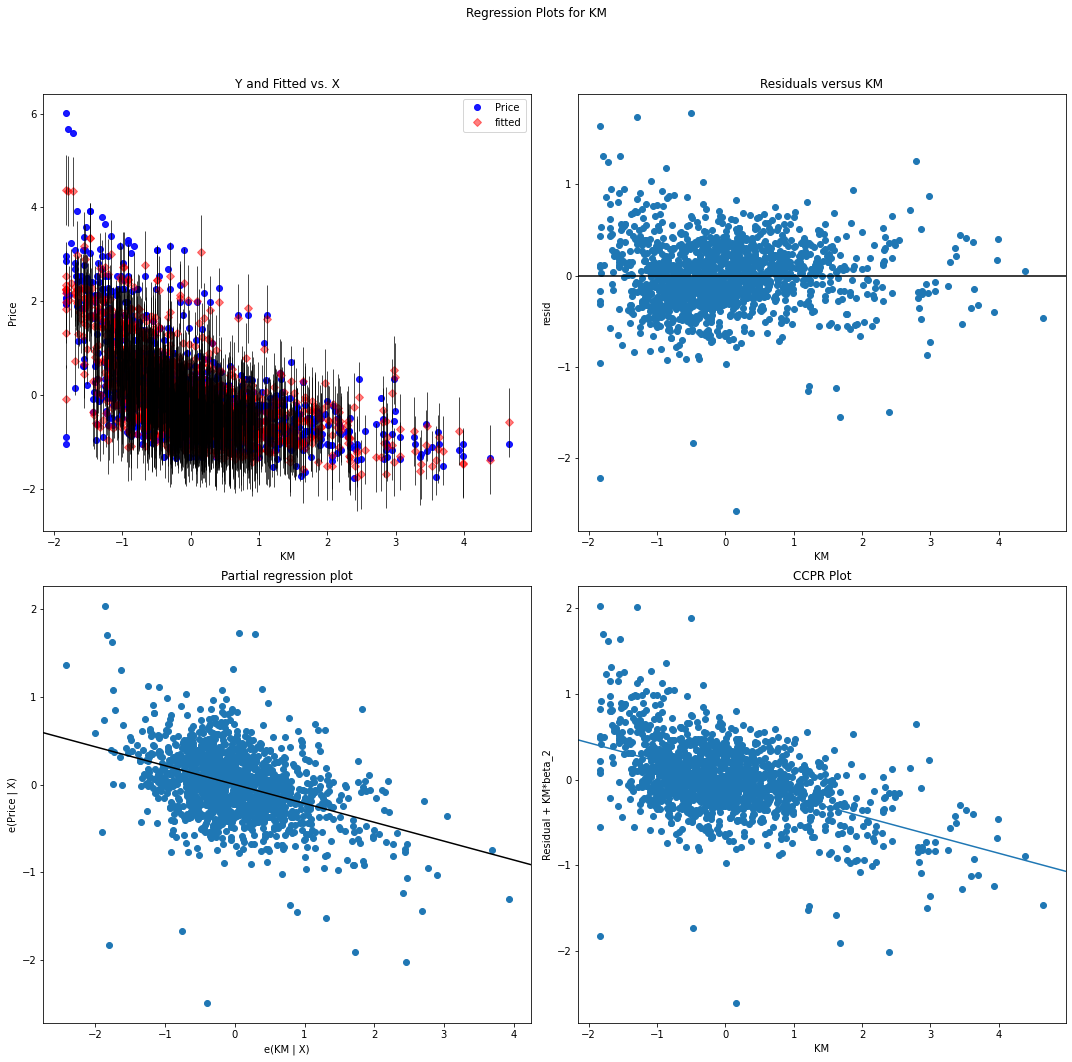

In [33]:
fig=plt.figure(figsize=(15,15))
fig = sn.graphics.plot_regress_exog(model_s, "KM", fig=fig)


eval_env: 1


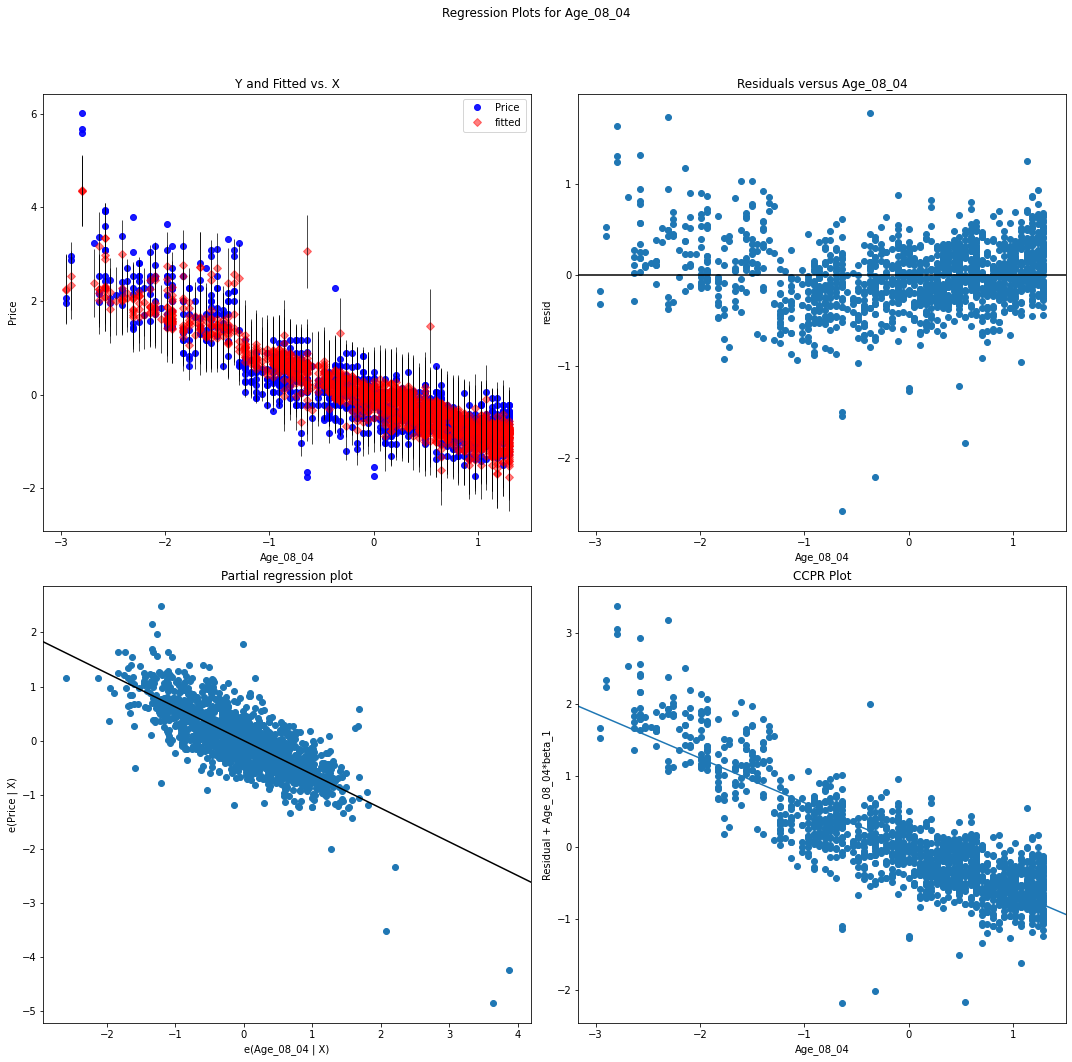

In [34]:
fig=plt.figure(figsize=(15,15))
fig = sn.graphics.plot_regress_exog(model_s, "Age_08_04", fig=fig)

eval_env: 1


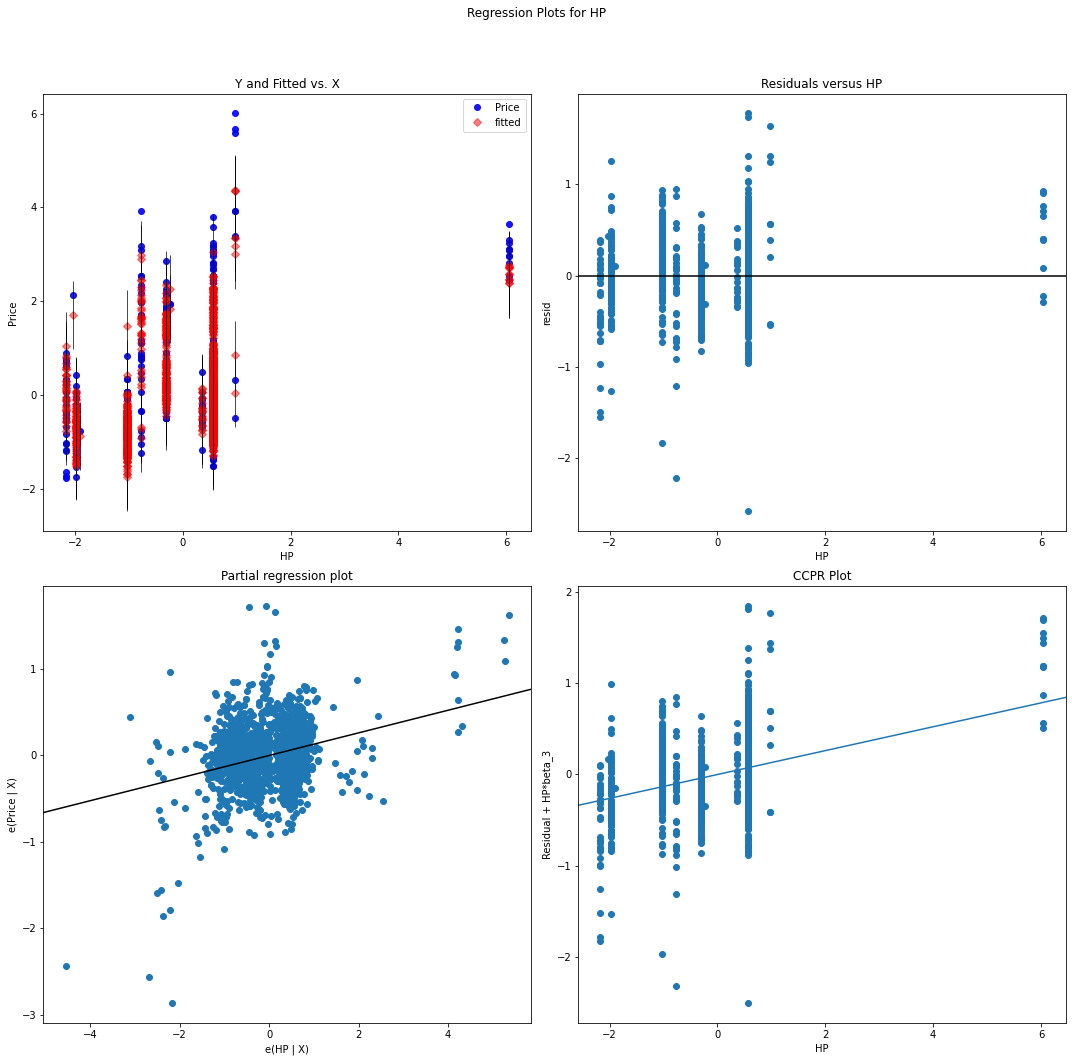

In [35]:
fig=plt.figure(figsize=(15,15))
fig = sn.graphics.plot_regress_exog(model_s, "HP", fig=fig)

eval_env: 1


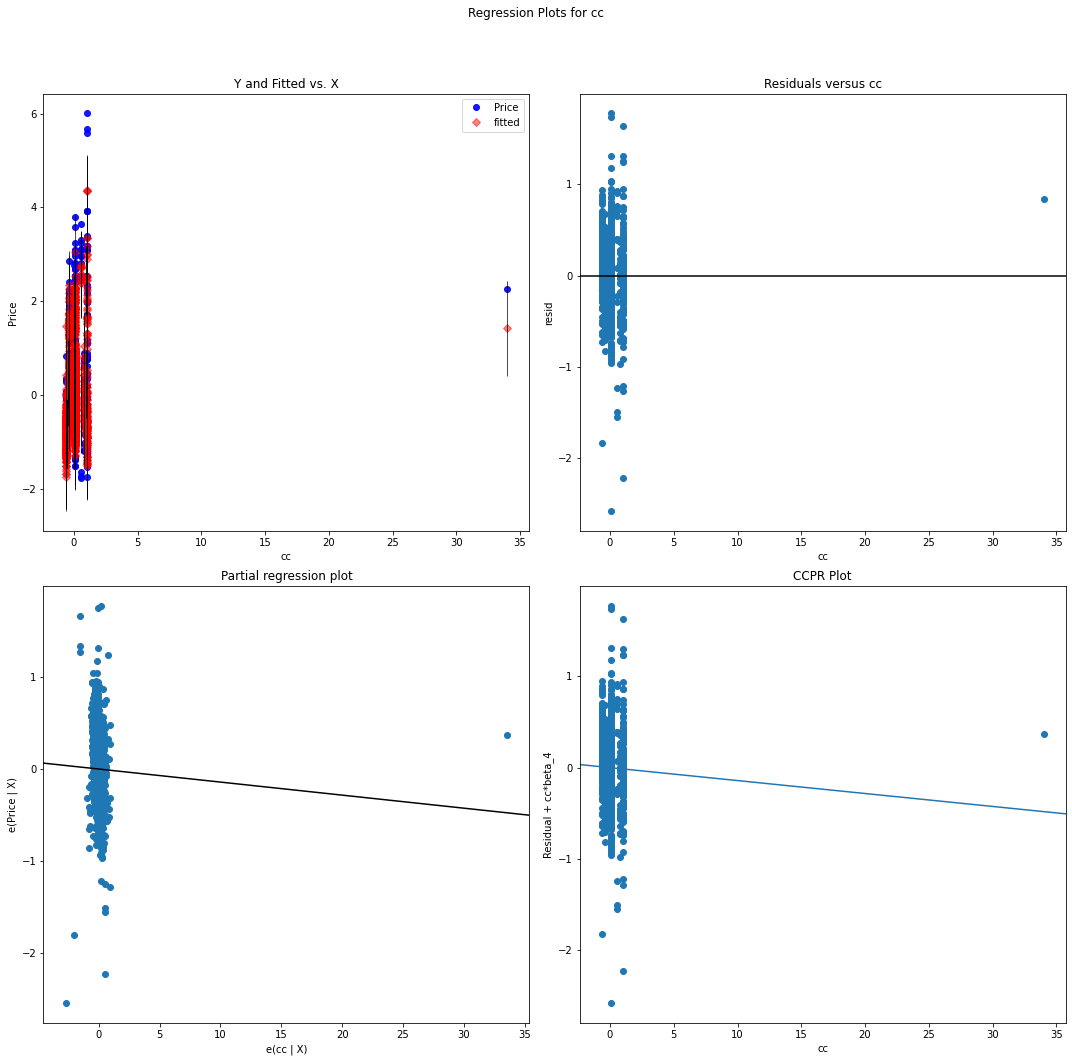

In [36]:
fig=plt.figure(figsize=(15,15))
fig = sn.graphics.plot_regress_exog(model_s, "cc", fig=fig)

eval_env: 1


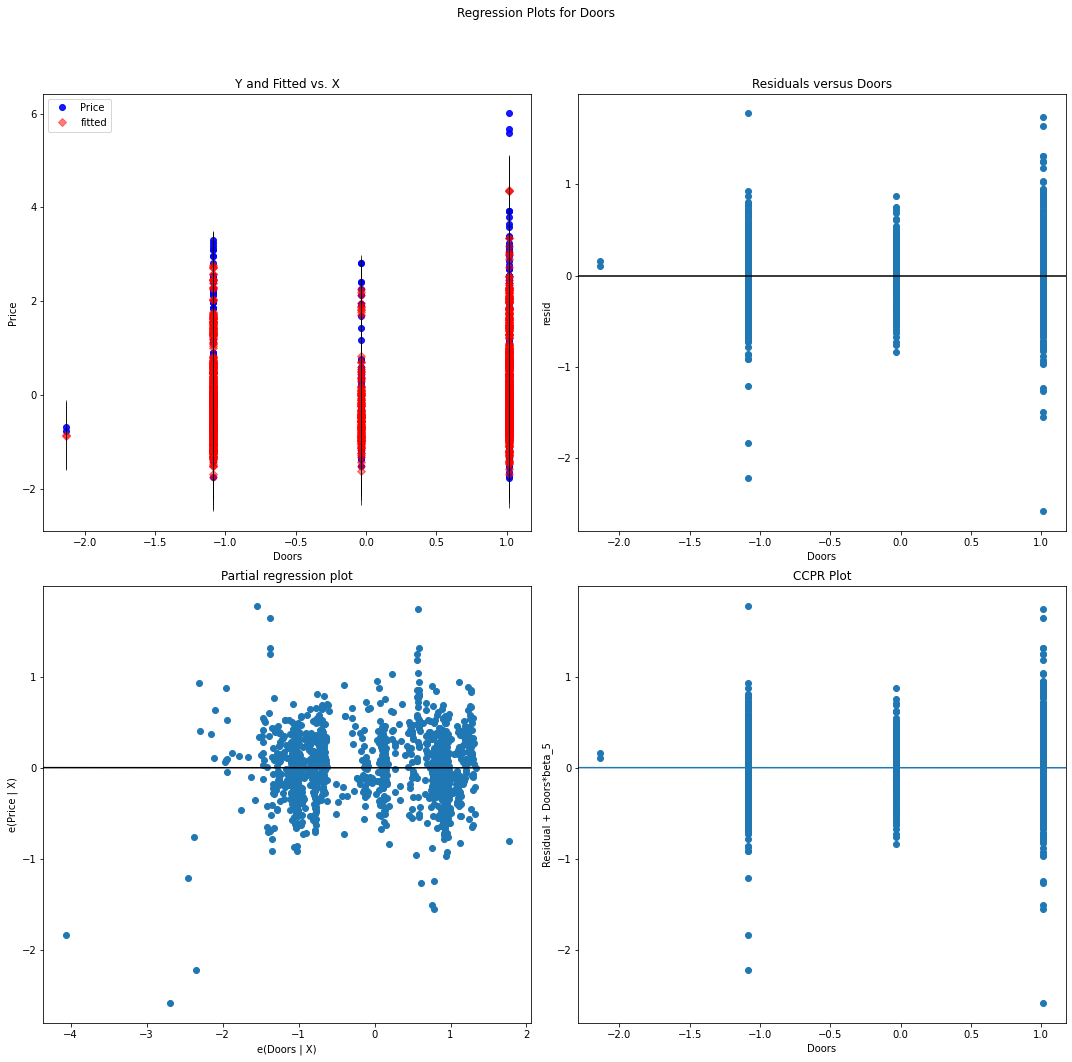

In [37]:
fig=plt.figure(figsize=(15,15))
fig = sn.graphics.plot_regress_exog(model_s, "Doors", fig=fig)

eval_env: 1


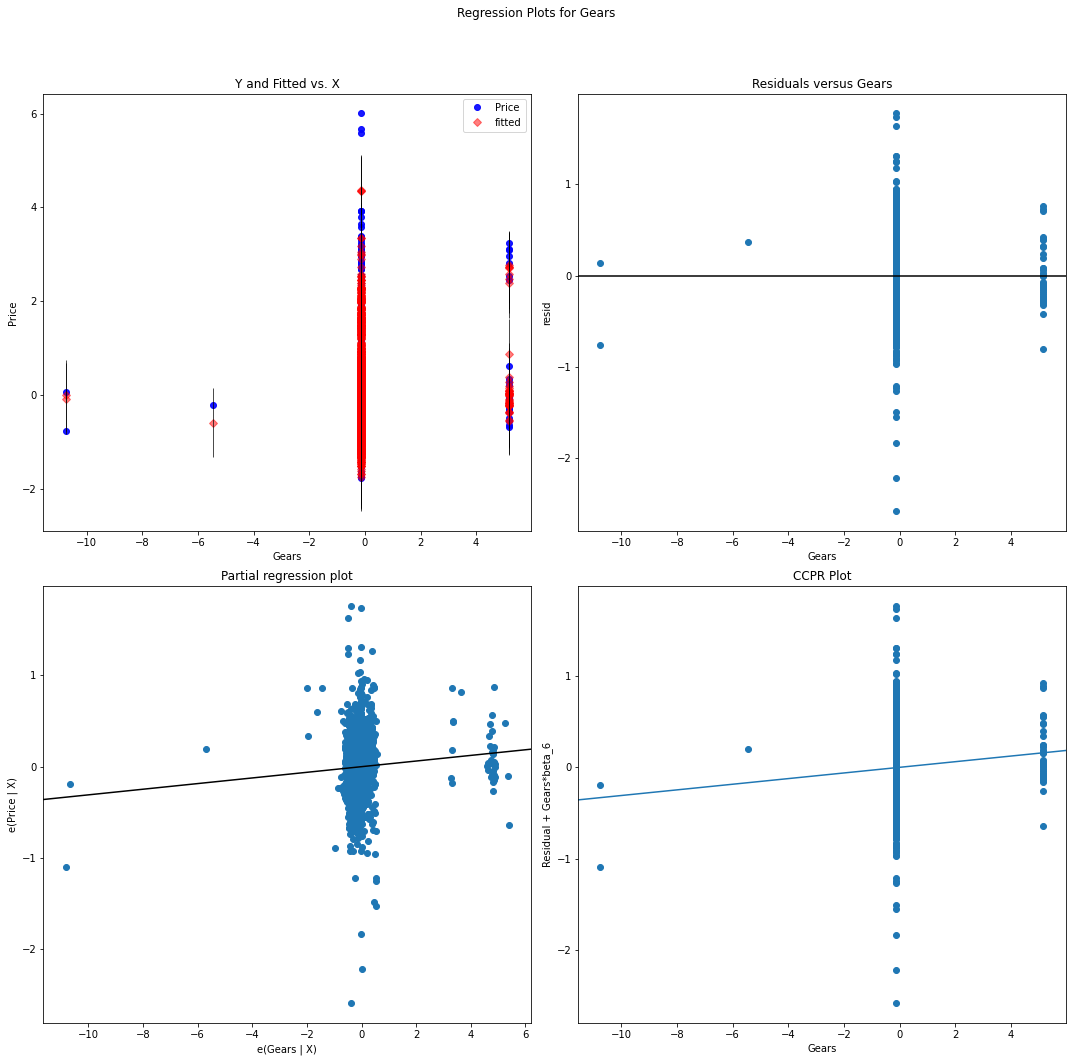

In [38]:
fig=plt.figure(figsize=(15,15))
fig = sn.graphics.plot_regress_exog(model_s, "Gears", fig=fig)

eval_env: 1


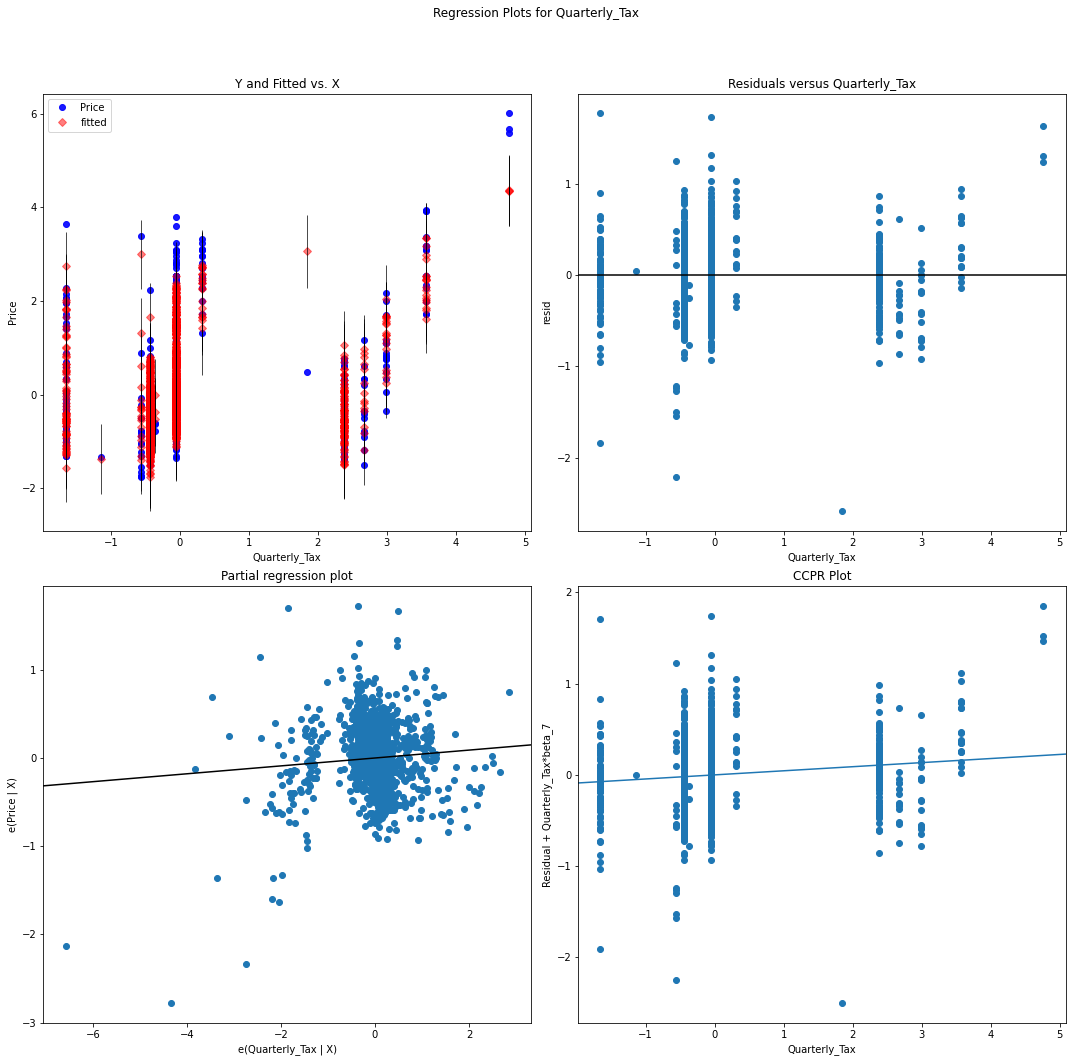

In [39]:
fig=plt.figure(figsize=(15,15))
fig = sn.graphics.plot_regress_exog(model_s, "Quarterly_Tax", fig=fig)

eval_env: 1


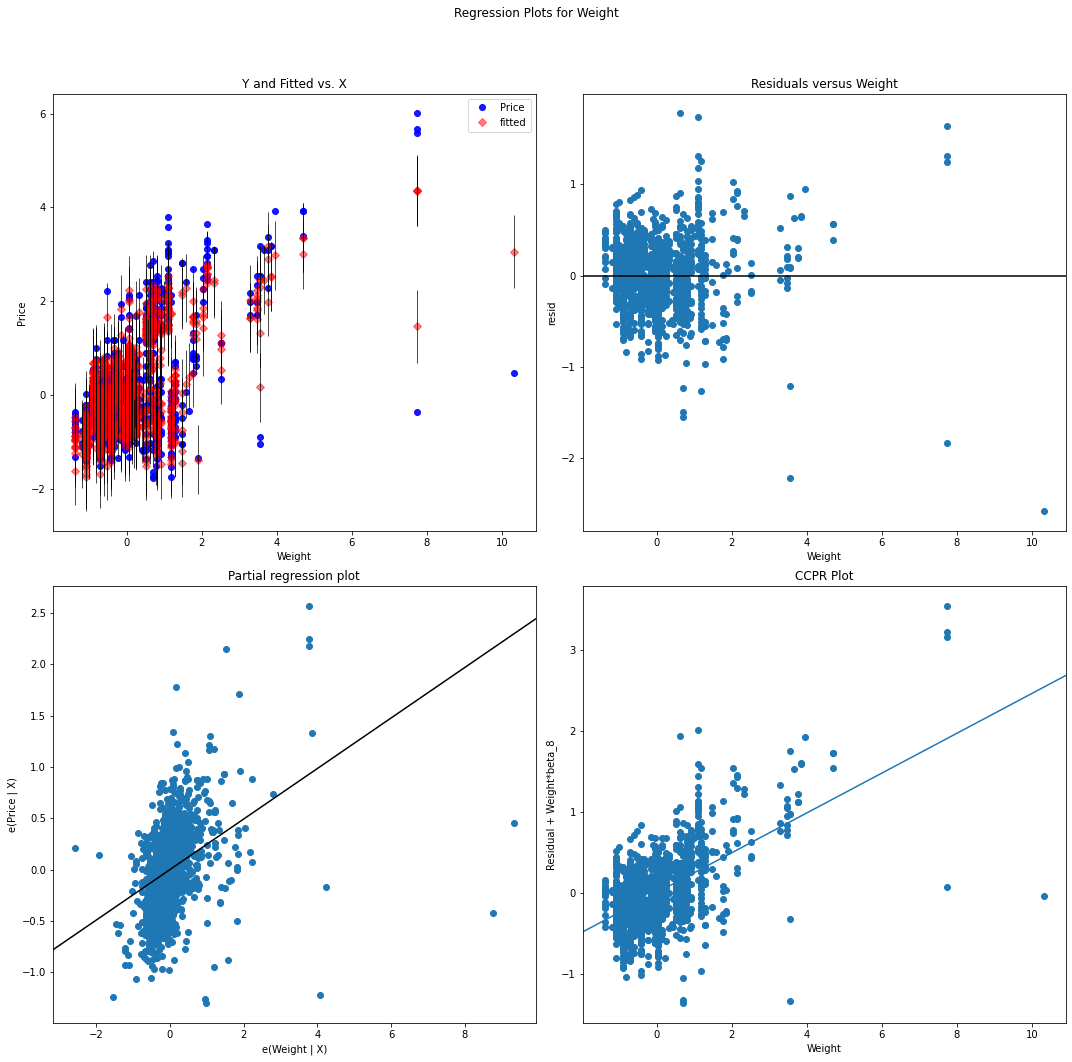

In [41]:
fig=plt.figure(figsize=(15,15))
fig = sn.graphics.plot_regress_exog(model_s, "Weight", fig=fig)

In [42]:
mod=snf.ols('Price~Doors',data=toyota_ss).fit()

In [43]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           1.46e-12
Time:                        18:26:46   Log-Likelihood:                -2012.5
No. Observations:                1436   AIC:                             4029.
Df Residuals:                    1434   BIC:                             4040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e-16      0.026   5.58e-15      1.000      -0.051       0.051
Doors          0.1853      0.026      7.142      0.000       0.134       0.236
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
toyota_ss.drop(['Doors'],axis=1,inplace=True)

In [45]:
model_p=snf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=toyota_ss).fit()

In [46]:
model_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:27:04   Log-Likelihood:                -606.37
No. Observations:                1436   AIC:                             1229.
Df Residuals:                    1428   BIC:                             1271.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.448e-16      0.010   1.48e-14      1.000      -0.019       0.019
Age_08_04        -0.6239      0.013    -46.528      0.000      -0.650      -0.598
KM               -0.2153      0.013    -16.636      0.000      -0.241      -0.190
HP                0.1308      0.012     11.270      0.000       0.108       0.154
cc               -0.0142      0.011     -1.344      0.179      -0.035       0.007
Gears             0.0310      0.010      3.081      0.002       0.011       0.051
Quarterly_Tax     0.0448      0.015      3.027      0.003       0.016       0.074
Weight            0.2460      0.015     16.401      0.000       0.217       0.275
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                         2.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
influence=model_p.get_influence()
(c, _)=influence.cooks_distance

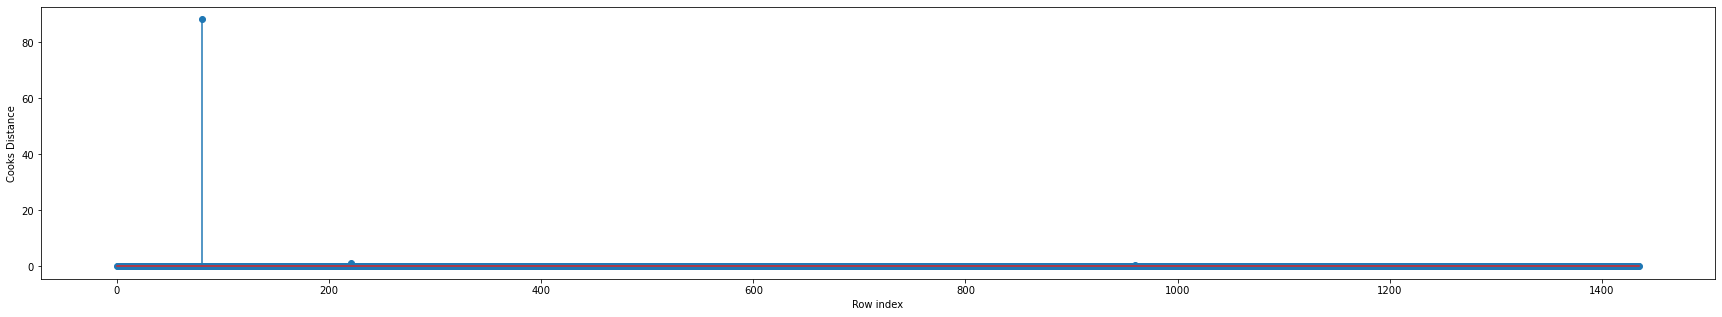

In [49]:
fig = plt.subplots(figsize=(30, 5))
plt.stem(np.arange(len(toyota_ss)), np.round(c, 2))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
(np.argmax(c),np,max(c))

(80,
 <module 'numpy' from 'C:\\Users\\sagar\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>,
 88.25985710302521)

<Figure size 2160x648 with 0 Axes>

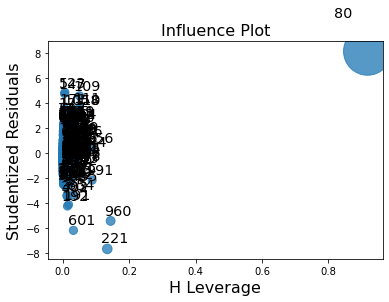

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
fig=plt.figure(figsize=(30,9))
influence_plot(model_p)
plt.show()

In [52]:
toyota_ss

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-0.140425,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-0.140425,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-0.140425,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-0.140425,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-0.140425,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-0.140425,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-0.140425,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-0.140425,-0.440785,-1.091915


In [53]:
toyota_ss.shape

(1436, 8)

In [54]:
k=toyota_ss.shape[1]
n=toyota_ss.shape[0]
leverage_cutoff_value=3*((1+k)/n)

In [55]:
leverage_cutoff_value

0.018802228412256268

In [56]:
toyota_ss.iloc[[220,959]]

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
220,0.336259,-0.696322,0.153407,0.56744,0.054555,-0.140425,-0.051626,0.048275
959,-0.506336,0.271757,-0.469636,0.56744,0.054555,-0.140425,-0.051626,-0.046740


In [57]:
toyota_ss.drop(toyota_ss.index[960],axis=0,inplace=True)

In [58]:
toyota_ss.shape

(1435, 8)

In [59]:
model_p=snf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=toyota_ss).fit()

In [60]:
model_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1323.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:27:36   Log-Likelihood:                -591.88
No. Observations:                1435   AIC:                             1200.
Df Residuals:                    1427   BIC:                             1242.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0015      0.010      0.154      0.877      -0.017       0.020
Age_08_04        -0.6130      0.013    -45.643      0.000      -0.639      -0.587
KM               -0.2175      0.013    -16.966      0.000      -0.243      -0.192
HP                0.1206      0.012     10.357      0.000       0.098       0.143
cc               -0.0176      0.010     -1.687      0.092      -0.038       0.003
Gears             0.0322      0.010      3.239      0.001       0.013       0.052
Quarterly_Tax     0.0229      0.015      1.504      0.133      -0.007       0.053
Weight            0.2784      0.016     17.383      0.000       0.247       0.310
==============================================================================
Omnibus:                      188.846   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1491.292
Skew:                          -0.330   Prob(JB):                         0.00
Kurtosis:                       7.950   Cond. No.                         3.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

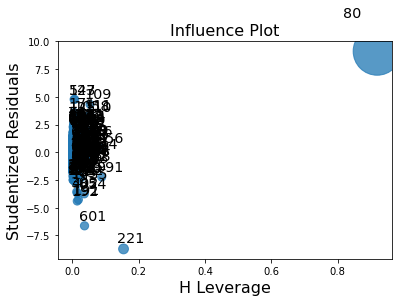

In [61]:
influence_plot(model_p)
plt.show()

In [62]:
model_p=snf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=toyota_ss).fit()
model_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1323.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:27:42   Log-Likelihood:                -591.88
No. Observations:                1435   AIC:                             1200.
Df Residuals:                    1427   BIC:                             1242.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0015      0.010      0.154      0.877      -0.017       0.020
Age_08_04        -0.6130      0.013    -45.643      0.000      -0.639      -0.587
KM               -0.2175      0.013    -16.966      0.000      -0.243      -0.192
HP                0.1206      0.012     10.357      0.000       0.098       0.143
cc               -0.0176      0.010     -1.687      0.092      -0.038       0.003
Gears             0.0322      0.010      3.239      0.001       0.013       0.052
Quarterly_Tax     0.0229      0.015      1.504      0.133      -0.007       0.053
Weight            0.2784      0.016     17.383      0.000       0.247       0.310
==============================================================================
Omnibus:                      188.846   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1491.292
Skew:                          -0.330   Prob(JB):                         0.00
Kurtosis:                       7.950   Cond. No.                         3.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""